In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
sns.set()

world_map = os.path.join('./data/', 'world_map.json')

# Import data and remove useless columns 

## Import data

In [2]:
gdp_per_person = pd.read_csv('./data/economic_features/GDP_per_capita.csv', sep=';')
cpi_2015 = pd.read_csv('./data/economic_features/CPI_2015.csv')
cpi_2017 = pd.read_csv('./data/economic_features/CPI_2017.csv')
debt_2015 = pd.read_csv('./data/economic_features/DEBT_2015.csv')
debt_2017 = pd.read_csv('./data/economic_features/DEBT_2017.csv')

## Dictionary with the country code of all OECD countries

In [3]:
oecd_countries = {'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'CAN': 'Canada', 'CHL': 'Chile', 'COL': 'Colombia', 'CZE': 'Czech Republic', 'DNK': 'Denmark', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'DEU': 'Germany', 'GRC': 'Greece', 'HUN': 'Hungary', 'ISL': 'Iceland', 'IRL': 'Ireland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'Korea', 'LVA': 'Latvia', 'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NZL': 'New Zealand', 'NOR': 'Norway', 'POL': 'Poland', 'PRT': 'Portugal', 'SVK': 'Slovakia', 'SVN': 'Slovenia', 'ESP': 'Spain', 'SWE': 'Sweden', 'CHE': 'Switzerland', 'TUR': 'Turkey', 'GBR': 'United Kingdom', 'USA': 'United States'}

## Preparation of the datasets

### Removal of unnecessary columns and countries

#### GDP per capita

In [4]:
gdp_per_person_oecd = pd.DataFrame(columns=gdp_per_person.columns)
for code in oecd_countries.keys():
    gdp_per_person_oecd = gdp_per_person_oecd.append(gdp_per_person[gdp_per_person['Country Code']==code])
gdp_2015_oecd = gdp_per_person_oecd[['Country Code', '2015']]
gdp_2017_oecd = gdp_per_person_oecd[['Country Code', '2017']]

#### Inflation rate 

In [5]:
cpi_2015_oecd = cpi_2015[['LOCATION', 'Value']]
cpi_2017_oecd = cpi_2017[['LOCATION', 'Value']]

#### Debt

In [6]:
debt_2015_oecd = debt_2015[['LOCATION', 'Value']]
debt_2017_oecd = debt_2017[['LOCATION', 'Value']]

### Sorting of data by date

# Overall descriptive statistics

## GDP per capita

In [7]:
print('Descriptive statistics for GDP per capita in 2015\n{}'.format(gdp_2015_oecd['2015'].describe()))
print('\n')
print('Descriptive statistics for GDP per capita in 2017\n{}'.format(gdp_2017_oecd['2017'].describe()))

Descriptive statistics for GDP per capita in 2015
count        37.000000
mean      35876.801978
std       22027.370837
min        6175.876030
25%       17522.230186
50%       35776.795162
75%       45175.231893
max      101376.496574
Name: 2015, dtype: float64


Descriptive statistics for GDP per capita in 2017
count        37.000000
mean      38501.480467
std       23098.727182
min        6376.706716
25%       18930.218628
50%       38812.161034
75%       48675.222335
max      107627.151007
Name: 2017, dtype: float64


Text(0.5, 1.0, 'GDP per capita in OECD countries in 2015')

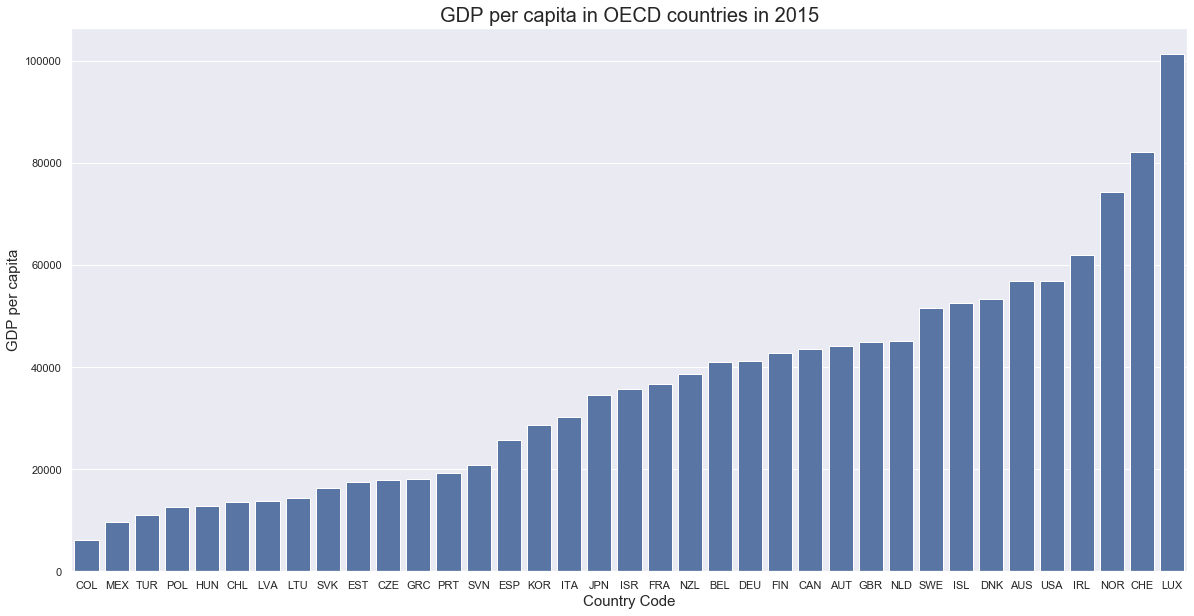

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x='Country Code',y='2015',data=gdp_2015_oecd,order=gdp_2015_oecd.sort_values('2015')['Country Code'],color="C0")
plt.xlabel('Country Code', size=15)
plt.ylabel('GDP per capita', size=15)
plt.title('GDP per capita in OECD countries in 2015', size=20)

Text(0.5, 1.0, 'GDP per capita in OECD countries in 2017')

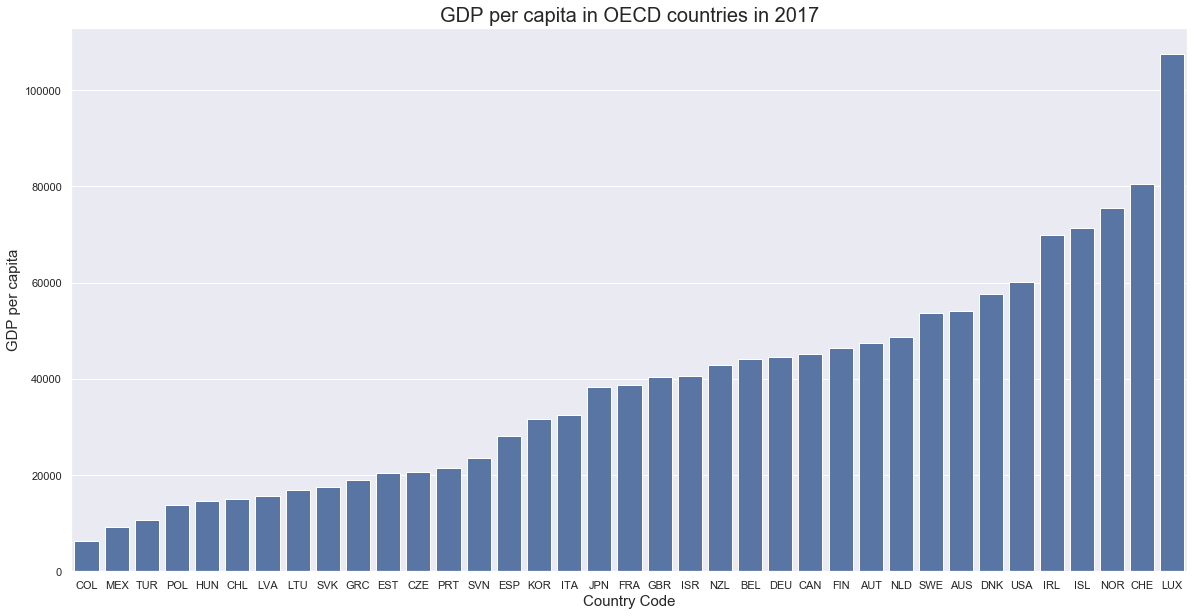

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='Country Code',y='2017',data=gdp_2017_oecd,order=gdp_2017_oecd.sort_values('2017')['Country Code'],color="C0")
plt.xlabel('Country Code', size=15)
plt.ylabel('GDP per capita', size=15)
plt.title('GDP per capita in OECD countries in 2017', size=20)

## Inflation rate measured by the CPI

In [8]:
print('Descriptive statistics for inflation rate in 2015\n{}'.format(cpi_2015_oecd.Value.describe()))
print('\n')
print('Descriptive statistics for inflation rate in 2017\n{}'.format(cpi_2017_oecd.Value.describe()))

Descriptive statistics for inflation rate in 2015
count    37.000000
mean      0.682191
std       1.787838
min      -1.736046
25%      -0.289879
50%       0.309365
75%       0.789518
max       7.670854
Name: Value, dtype: float64


Descriptive statistics for inflation rate in 2017
count    37.000000
mean      2.156439
std       1.886456
min       0.244953
25%       1.311946
50%       1.850787
75%       2.182719
max      11.144310
Name: Value, dtype: float64


Text(0.5, 1.0, 'Inflation rate in OECD countries in 2015')

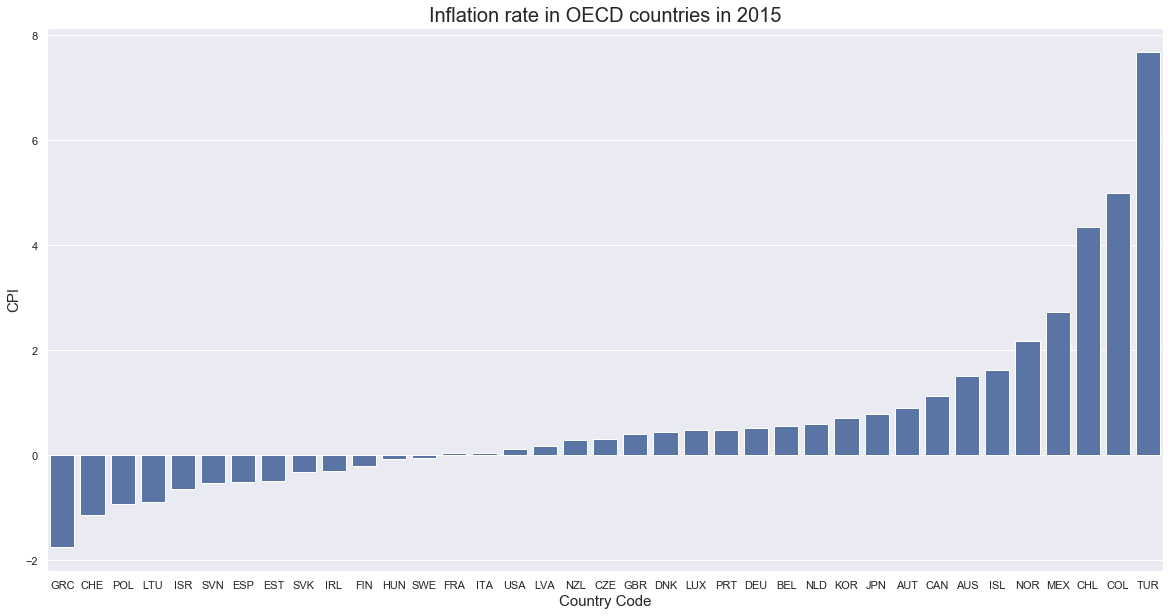

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='Value',data=cpi_2015_oecd,order=cpi_2015_oecd.sort_values('Value')['LOCATION'],color="C0")
plt.xlabel('Country Code', size=15)
plt.ylabel('CPI', size=15)
plt.title('Inflation rate in OECD countries in 2015', size=20)

Text(0.5, 1.0, 'Inflation rate in OECD countries in 2017')

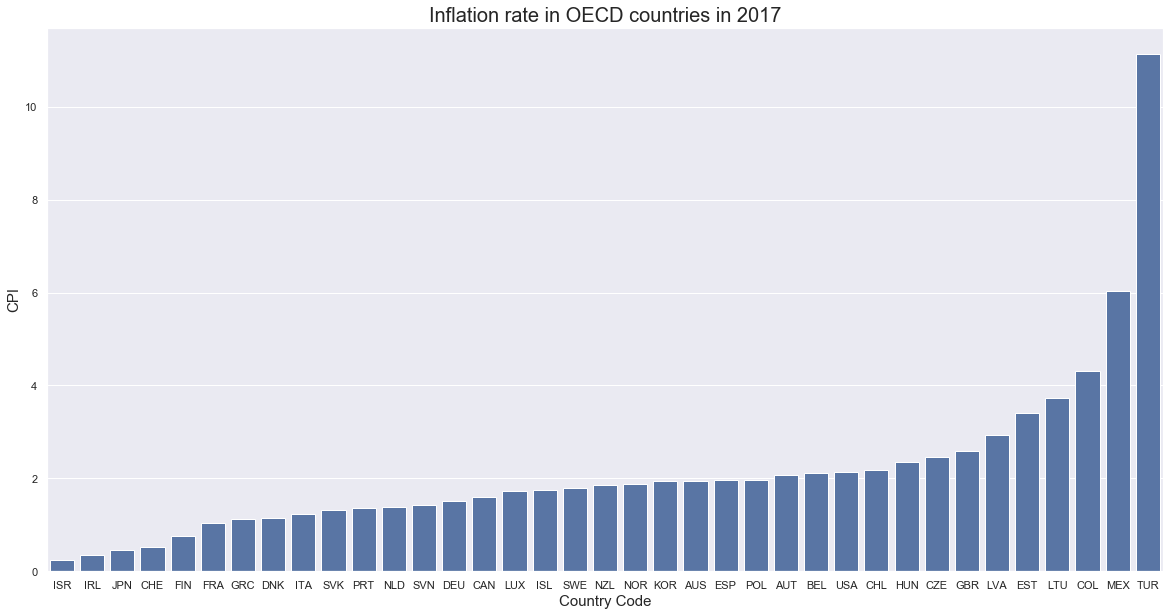

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='Value',data=cpi_2017_oecd,order=cpi_2017_oecd.sort_values('Value')['LOCATION'],color="C0")
plt.xlabel('Country Code', size=15)
plt.ylabel('CPI', size=15)
plt.title('Inflation rate in OECD countries in 2017', size=20)

## Debt in % of GDP

In [9]:
print('Descriptive statistics for debt in 2015\n{}'.format(debt_2015_oecd.Value.describe()))
print('\n')
print('Descriptive statistics for debt in 2017\n{}'.format(debt_2017_oecd.Value.describe()))

Descriptive statistics for debt in 2015
count     34.000000
mean      86.226445
std       48.397491
min       12.633880
25%       53.360973
50%       76.037740
75%      114.133925
max      237.093900
Name: Value, dtype: float64


Descriptive statistics for debt in 2017
count     34.000000
mean      84.050444
std       48.018944
min       13.088830
25%       48.526190
50%       72.913605
75%      113.972025
max      234.042600
Name: Value, dtype: float64


Text(0.5, 1.0, 'Debt in % of GDP in OECD countries in 2015')

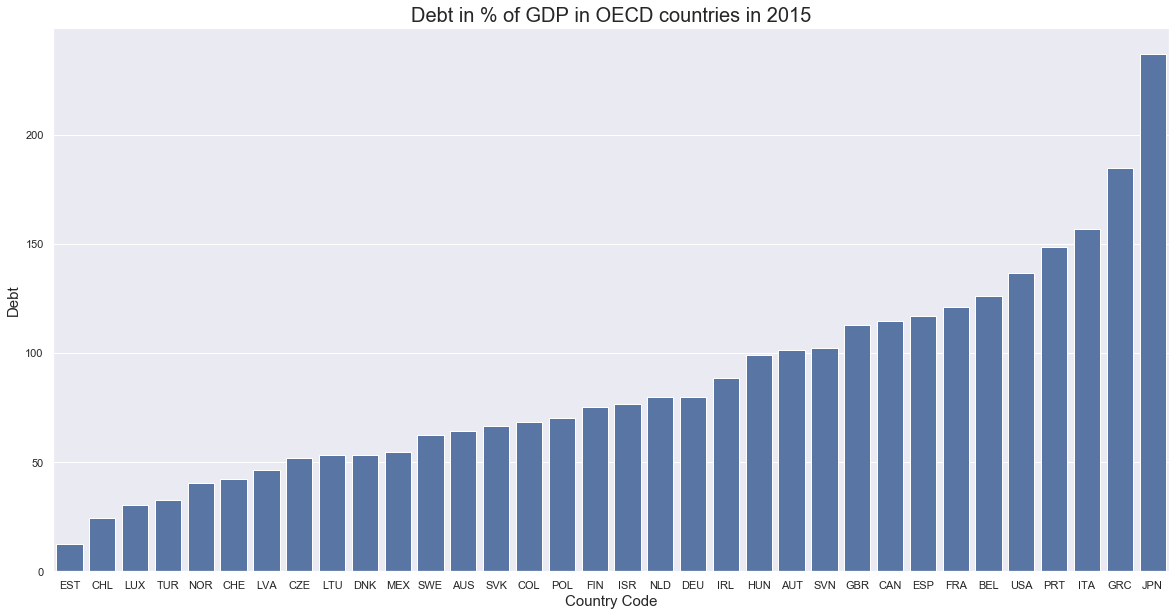

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='Value',data=debt_2015_oecd,order=debt_2015_oecd.sort_values('Value')['LOCATION'],color="C0")
plt.xlabel('Country Code', size=15)
plt.ylabel('Debt', size=15)
plt.title('Debt in % of GDP in OECD countries in 2015', size=20)

Text(0.5, 1.0, 'Debt in % of GDP in OECD countries in 2017')

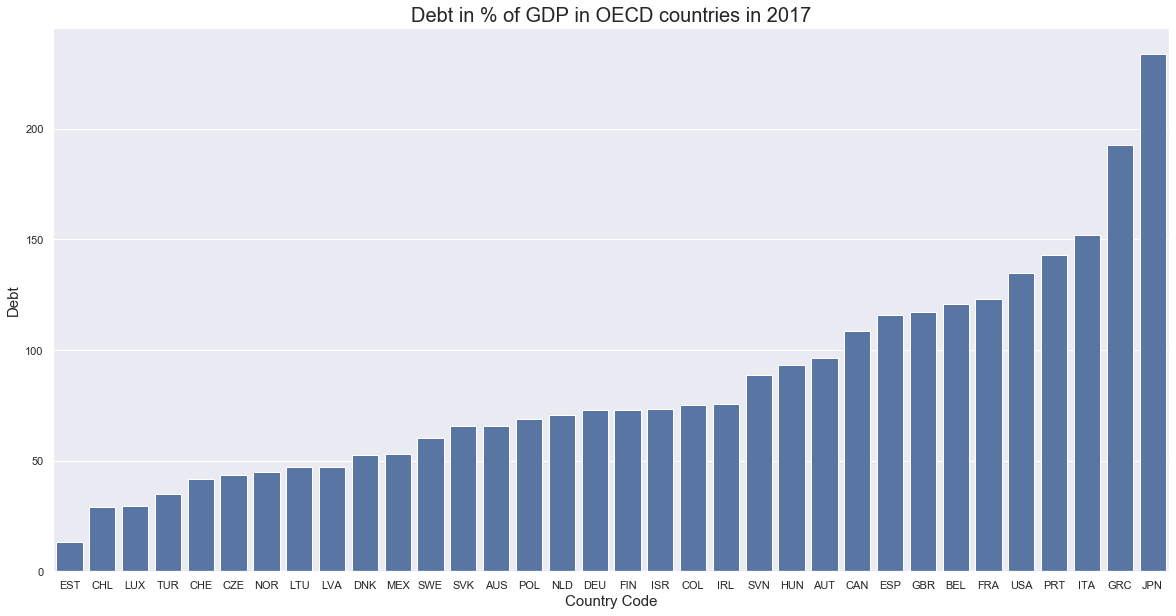

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='Value',data=debt_2017_oecd,order=debt_2017_oecd.sort_values('Value')['LOCATION'],color="C0")
plt.xlabel('Country Code', size=15)
plt.ylabel('Debt', size=15)
plt.title('Debt in % of GDP in OECD countries in 2017', size=20)

# World maps

## GDP per capita in 2015

In [10]:
gdp_map_2015 = folium.Map(min_zoom=1, max_zoom=3)
folium.Choropleth(
 geo_data=world_map,
 name='choropleth',
 data=gdp_2015_oecd,
 columns=['Country Code', '2015'],
 key_on='feature.properties.adm0_a3',
 line_opacity=0.4,
 nan_fill_color="black",
 nan_fill_opacity=0.2,
 bins = np.linspace(np.min(gdp_2015_oecd['2015']), np.max(gdp_2015_oecd['2015']), 6),
 highlight=True,
 legend_name='GDP per person for OECD countries in 2015 (in current US$)',
).add_to(gdp_map_2015)

In [11]:
gdp_map_2015

## GDP per capita in 2017

In [12]:
gdp_map_2017 = folium.Map(min_zoom=1, max_zoom=3)
folium.Choropleth(
 geo_data=world_map,
 name='choropleth',
 data=gdp_2017_oecd,
 columns=['Country Code', '2017'],
 key_on='feature.properties.adm0_a3',
 line_opacity=0.4,
 nan_fill_color="black",
 nan_fill_opacity=0.2,
 bins = np.linspace(np.min(gdp_2017_oecd['2017']), np.max(gdp_2017_oecd['2017']), 6),
 highlight=True,
 legend_name='GDP per person for OECD countries in 2017 (in current US$)',
).add_to(gdp_map_2017)

In [13]:
gdp_map_2017

## Inflation rate in 2015

In [14]:
cpi_map_2015 = folium.Map(min_zoom=1, max_zoom=3)
folium.Choropleth(
 geo_data=world_map,
 name='choropleth',
 data=cpi_2015_oecd,
 columns=['LOCATION', 'Value'],
 key_on='feature.properties.adm0_a3',
 line_opacity=0.4,
 nan_fill_color="black",
 nan_fill_opacity=0.2,
 bins = np.linspace(np.min(cpi_2015_oecd['Value']), np.max(cpi_2015_oecd['Value']), 6),
 highlight=True,
 legend_name='Inflation rate for OECD countries in 2015 (in current US$)',
).add_to(cpi_map_2015)

In [15]:
cpi_map_2015

## Inflation rate in 2017

In [16]:
cpi_map_2017 = folium.Map(min_zoom=1, max_zoom=3)
folium.Choropleth(
 geo_data=world_map,
 name='choropleth',
 data=cpi_2017_oecd,
 columns=['LOCATION', 'Value'],
 key_on='feature.properties.adm0_a3',
 line_opacity=0.4,
 nan_fill_color="black",
 nan_fill_opacity=0.2,
 bins = np.linspace(np.min(cpi_2017_oecd['Value']), np.max(cpi_2017_oecd['Value']), 6),
 highlight=True,
 legend_name='GDP per person for OECD countries in 2017 (in current US$)',
).add_to(cpi_map_2017)

In [17]:
cpi_map_2017

## Debt in 2015

In [21]:
debt_map_2015 = folium.Map(min_zoom=1, max_zoom=3)
folium.Choropleth(
 geo_data=world_map,
 name='choropleth',
 data=debt_2015_oecd,
 columns=['LOCATION', 'Value'],
 key_on='feature.properties.adm0_a3',
 line_opacity=0.4,
 nan_fill_color="black",
 nan_fill_opacity=0.2,
 bins = np.linspace(np.min(debt_2015_oecd['Value']), np.max(debt_2015_oecd['Value']), 6),
 highlight=True,
 legend_name='GDP per person for OECD countries in 2017 (in current US$)',
).add_to(debt_map_2015)

In [22]:
debt_map_2015

## Debt in 2017

In [18]:
debt_map_2017 = folium.Map(min_zoom=1, max_zoom=3)
folium.Choropleth(
 geo_data=world_map,
 name='choropleth',
 data=debt_2017_oecd,
 columns=['LOCATION', 'Value'],
 key_on='feature.properties.adm0_a3',
 line_opacity=0.4,
 nan_fill_color="black",
 nan_fill_opacity=0.2,
 bins = np.linspace(np.min(debt_2017_oecd['Value']), np.max(debt_2017_oecd['Value']), 6),
 highlight=True,
 legend_name='GDP per person for OECD countries in 2017 (in current US$)',
).add_to(debt_map_2017)

In [19]:
debt_map_2017